Collect the .npy files all together!

In [1]:
import os
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
import datetime

# Get the current date and time
now = datetime.datetime.now()
defect_combinations = pd.read_csv("../Filtered_Defect_combinations.csv")

# Base directory containing the batch folders
base_directory = "../PhonDos_dataset"
output_pkl = f"eigvals_data_{now}.pkl"

# Regex pattern to extract i, j, and formula from filename
pattern = re.compile(r"eigvals_(\d+)_([\d]+)_(.+)\.npy")

data = []

# Loop through batch_1 to batch_10
for batch_num in tqdm(range(1, 11)):
    directory = os.path.join(base_directory, f"batch_{batch_num}")
    
    if not os.path.exists(directory):
        print(f"Skipping {directory}, does not exist.")
        continue
    
    for filename in os.listdir(directory):
        if filename.endswith(".npy"):
            match = pattern.match(filename)
            if match:
                i, j, formula = match.groups()
                i, j = int(i), int(j)  # Convert to integers
                file_path = os.path.join(directory, filename)

                # Load the numpy array
                eigvals = np.load(file_path)

                # Store prior defect options
                dopant_options = set(eval(defect_combinations.iloc[i - 1]["p_dopant"]) + \
                    eval(defect_combinations.iloc[i - 1]["n_dopant"]))
                
                data.append([i, j, formula, np.array(eigvals), dopant_options])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["i", "j", "formula", "eigvals", "dopant_options"])
df = df.sort_values(by=["i", "j"]).reset_index(drop=True)

# Save to CSV
#df.to_pickle(output_pkl)

print(f"Pickle file saved as {output_pkl}")
df.head(25)


100%|██████████| 10/10 [00:02<00:00,  4.28it/s]

Pickle file saved as eigvals_data_2025-02-27 22:46:40.500253.pkl


,i,j,formula,eigvals,dopant_options
0,1,0,H216Cl72Cu72N72,"[0.0025655160083666697j, 0.002565470580968907j...","{Se, F, Zn, O, S}"
1,1,1,H210Cl68Cu72N72O6S,"[0.0029597269039398806j, 0.001546093204193871j...","{Se, F, Zn, O, S}"
2,7,0,Ba54Cu108Se216Sn54,"[8.342751303574579e-06j, (2.193019266976052e-0...","{Cu, Zn, Ta, Co, K, La, Cs, N, Rb, Hg}"
3,7,1,Ba51Cu106N4RbSe212Sn53,"[9.267624818972872e-06j, (2.7764299429628226e-...","{Cu, Zn, Ta, Co, K, La, Cs, N, Rb, Hg}"
4,7,2,Ba54CoCu106N3Se211Sn53,"[5.934570184207046e-06j, (8.336238889064527e-0...","{Cu, Zn, Ta, Co, K, La, Cs, N, Rb, Hg}"
5,7,3,Ba53Cu107N2Se214Sn54,"[5.009459220745761e-06j, (4.972261253717353e-0...","{Cu, Zn, Ta, Co, K, La, Cs, N, Rb, Hg}"
6,8,0,H72F288P72,"[0.00011345403082956431j, 3.6963339862821213e-...","{Zn, O, Ba, Na, Li, P, N, Tl, Sr}"
7,9,0,Mn36Na216S144,"[2.7485703981516482e-05j, 1.204917890628064e-0...","{W, F, Ca, Sb, Er, O, Na, Li, N, Ho}"
8,9,1,LiMn33NNa214S141Sb,"[1.7842142954072956e-05j, 1.1195733425645771e-...","{W, F, Ca, Sb, Er, O, Na, Li, N, Ho}"
9,9,2,Mn35N3Na214S138,"[2.3888168735873248e-05j, 2.2051890228432386e-...","{W, F, Ca, Sb, Er, O, Na, Li, N, Ho}"


In [2]:
num_entries = df[df["j"] != 0].shape[0]
len(df), num_entries

(9595, 7596)

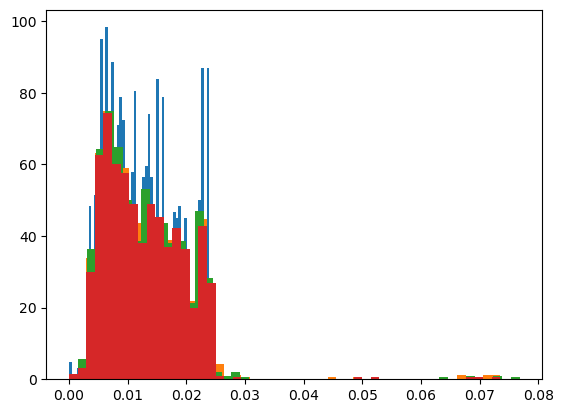

In [3]:
from matplotlib import pyplot as plt

for i in range(2, 6):
    dos = np.real(df.iloc[i]["eigvals"])
    plt.hist(dos, bins=50, density=True)

plt.show()